In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

import xarray as xr
import matplotlib.ticker as mticker
from matplotlib import colors as c
import geopandas
from shapely.geometry import Point, Polygon
import regionmask
import descartes

In [6]:
mfdataDIR_fsw = "/Volumes/Sunniva's h/fsw/fsw_*.nc"
variable_senorge = 'snow_amount'
FSW = xr.open_mfdataset(mfdataDIR_fsw)[variable_senorge]
FSW

<xarray.DataArray 'snow_amount' (time: 18628, y: 1550, x: 1195)>
dask.array<concatenate, shape=(18628, 1550, 1195), dtype=float32, chunksize=(366, 1550, 1195), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01 1970-01-02 ... 2020-12-31
  * y        (y) float64 6.45e+06 6.451e+06 6.452e+06 ... 7.998e+06 7.999e+06
  * x        (x) float64 -7.5e+04 -7.4e+04 -7.3e+04 ... 1.118e+06 1.119e+06
    lon      (y, x) float64 dask.array<chunksize=(1550, 1195), meta=np.ndarray>
    lat      (y, x) float64 dask.array<chunksize=(1550, 1195), meta=np.ndarray>
Attributes:
    grid_mapping:   projection_info
    name:           snow_amount
    units:          mm
    standard_name:  snow_amount
    longname:       fresh snow water equivalent

In [ ]:
#mfdataDIR_swe = "/Volumes/Sunniva's h/swe/swe_*.nc"
#SWEC = xr.open_mfdataset(mfdataDIR_swe)

In [ ]:
#mfdataDIR_sd = "/Volumes/Sunniva's h/sd/sd_*.nc"
#SD = xr.open_mfdataset(mfdataDIR_sd)

In [ ]:
#mfdataDIR_lwc = "/Volumes/Sunniva's h/lwc/lwc_*.nc"
#LWC = xr.open_mfdataset(mfdataDIR_lwc)

In [ ]:
#mfdataDIR_qsw = "/Volumes/Sunniva's h/qsw/qsw_*.nc"
#QSW = xr.open_mfdataset(mfdataDIR_qsw)

['Hydrologi_TotalNedborfeltMalestasjon.shx']
objType                                   NedbørfeltMålestasjon
feltNr                                                     1902
stSamletID                                         016000001000
stID                                                    160.1.0
stNavn                                             Storglåmvatn
areal_km2                                                251.85
Q6190Mm3Aa                                               797.15
Q6190mmAar                                              3165.18
Q6190lskm2                                               100.32
vf6190m3s                                                 25.27
uttakDato                                            2021-09-23
ekspType                               NVEs nedlastningsløsning
geometry      POLYGON Z ((14.35082813994262 66.7934058783317...
Name: 0, dtype: object


<AxesSubplot:>

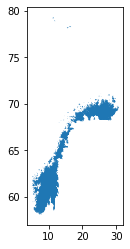

In [7]:
dirl_shape  = "nedbørsfeltNVE/NVE_shape/NVEData/Hydrologi/"
files = os.listdir(dirl_shape)
files = np.sort(files)
files_txt = [i for i in files if i.endswith('.shx')]
print(files_txt)

myfile = dirl_shape+files_txt[0]
import geopandas as gpd
shapefile = gpd.read_file(myfile)
print(shapefile.iloc[0])
shapefile.plot()

In [8]:
dirl  = "Discharge/"
files = os.listdir(dirl)
files = np.sort(files)
files_txt = [i for i in files if i.endswith('.txt_')]

files_txt = [i[:-5] for i in files if i.endswith('.txt_')]
files_txt.sort(key=int)
files_txt

['200284',
 '600010',
 '1900079',
 '5500004',
 '7200005',
 '9100002',
 '12700013',
 '15600008',
 '19600007',
 '24400002',
 '31100460']

In [9]:
my_st = ['2.284.0','6.10.0', '19.79.0', '55.4.0','72.5.0','91.2.0','127.13.0','156.8.0','196.7.0','244.2.0','311.460.0'] 

In [ ]:
selected_stations = files_txt
nf = shapefile

Error: Session cannot generate requests

In [11]:
nf_selected = nf[nf.stID.isin(my_st)]
nf_selected = nf_selected.reset_index()
st_names = nf_selected.stID
st_names

0       19.79.0
1       156.8.0
2       196.7.0
3       244.2.0
4       2.284.0
5      127.13.0
6        72.5.0
7        55.4.0
8        91.2.0
9        6.10.0
10    311.460.0
Name: stID, dtype: object

<AxesSubplot:>

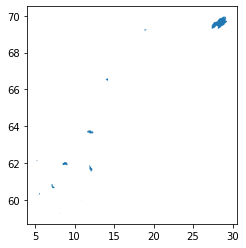

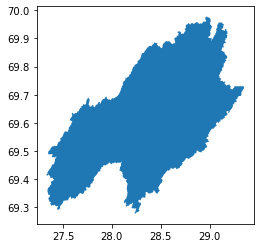

In [12]:
nf_selected.plot()

nf_selected.iloc[[3]].plot()

In [13]:
st_regions = regionmask.from_geopandas(nf_selected, names='stID', name='catchment')
st_regions

<regionmask.Regions>
Name:     catchment

Regions:
 0  r0   19.79.0
 1  r1   156.8.0
 2  r2   196.7.0
 3  r3   244.2.0
 4  r4   2.284.0
..  ..       ...
 6  r6    72.5.0
 7  r7    55.4.0
 8  r8    91.2.0
 9  r9    6.10.0
10 r10 311.460.0

[11 regions]

In [15]:
mask_regions = st_regions.mask(FSW.lon, FSW.lat)
#mask_regions.plot()

In [16]:
FSW.close()

In [ ]:
multiple_stIDs = []
for i in range(0,len(st_regions)):
    multiple_stIDs.append(st_names[i] )
multiple_stIDs

Error: Session cannot generate requests

In [ ]:
multi_d = []
for i in range(0,len(st_regions)):
    multi_key = st_regions.map_keys(multiple_stIDs[i])
    multi_d.append(FSW.where(mask_regions == multi_key))


Error: Session cannot generate requests

In [20]:
multi_d

[<xarray.DataArray 'snow_amount' (time: 18628, y: 1550, x: 1195)>
 dask.array<where, shape=(18628, 1550, 1195), dtype=float32, chunksize=(366, 1550, 1195), chunktype=numpy.ndarray>
 Coordinates:
   * time     (time) datetime64[ns] 1970-01-01 1970-01-02 ... 2020-12-31
   * y        (y) float64 6.45e+06 6.451e+06 6.452e+06 ... 7.998e+06 7.999e+06
   * x        (x) float64 -7.5e+04 -7.4e+04 -7.3e+04 ... 1.118e+06 1.119e+06
     lon      (y, x) float64 dask.array<chunksize=(1550, 1195), meta=np.ndarray>
     lat      (y, x) float64 dask.array<chunksize=(1550, 1195), meta=np.ndarray>
 Attributes:
     grid_mapping:   projection_info
     name:           snow_amount
     units:          mm
     standard_name:  snow_amount
     longname:       fresh snow water equivalent,
 <xarray.DataArray 'snow_amount' (time: 18628, y: 1550, x: 1195)>
 dask.array<where, shape=(18628, 1550, 1195), dtype=float32, chunksize=(366, 1550, 1195), chunktype=numpy.ndarray>
 Coordinates:
   * time     (time) datetime

In [21]:
multi_mean = multi_d[0].mean(dim=['x','y']).to_dataframe()
multi_mean = multi_mean.rename(columns={multi_d[0].name: multiple_stIDs[0]})


In [ ]:
for i in range(1,11):
    multi_mean[multiple_stIDs[i]]= multi_d[i].mean(dim=['x','y']).to_dataframe()
multi_mean

Error: Session cannot generate requests